## Perform Sentiment Analysis

In [7]:
import os
import pandas as pd

# Initialize a dictionary to store DataFrames
dataframes = {}

# Get the current working directory
directory_path = os.getcwd()

# Iterate over all files in the current directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):  # Only process CSV files
        file_path = os.path.join(directory_path, filename)
        # Use the filename without the extension as the key
        file_key = os.path.splitext(filename)[0]
        # Load the CSV file into a DataFrame and store it in the dictionary
        dataframes[file_key] = pd.read_csv(file_path)
        print(f"Loaded {filename} as {file_key}")



Loaded sentimentAnalysisEvil_1_without_history.csv as sentimentAnalysisEvil_1_without_history
Loaded sentimentAnalysisEvil_1_with_history.csv as sentimentAnalysisEvil_1_with_history
Loaded sentimentAnalysisEvil_2_without_history.csv as sentimentAnalysisEvil_2_without_history
Loaded sentimentAnalysisEvil_2_with_history.csv as sentimentAnalysisEvil_2_with_history
Loaded sentimentAnalysisWHistEvil_1_without_history.csv as sentimentAnalysisWHistEvil_1_without_history
Loaded sentimentAnalysisWHistEvil_2_without_history.csv as sentimentAnalysisWHistEvil_2_without_history
Loaded sentimentAnalysis_1_without_history.csv as sentimentAnalysis_1_without_history
Loaded sentimentAnalysis_1_with_history.csv as sentimentAnalysis_1_with_history
Loaded sentimentAnalysis_2_without_history.csv as sentimentAnalysis_2_without_history
Loaded sentimentAnalysis_2_with_history.csv as sentimentAnalysis_2_with_history


In [8]:
import spacy
from textblob import TextBlob

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to perform sentiment analysis on each utterance in the "Details" column using TextBlob
def analyze_sentiments(details):
    # Split the details by the semicolon to separate each utterance
    utterances = details.split(";")
    sentiments = []
    for utterance in utterances:
        if utterance.strip():  # Ensure the utterance is not just whitespace
            # Split the utterance into speaker and message
            if ":" in utterance:
                speaker, message = utterance.split(":", 1)
                speaker = speaker.strip()  # Remove any leading/trailing whitespace from the speaker's name
                message = message.strip()  # Remove any leading/trailing whitespace from the message
            else:
                # If no speaker is found, assume it's just a message
                speaker = "Unknown"
                message = utterance.strip()
            
            # Process the message with spaCy
            doc = nlp(message)
            # Compute sentiment score using TextBlob
            sentiment = TextBlob(doc.text).sentiment
            score = {
                'speaker': speaker,
                'polarity': sentiment.polarity,
                'subjectivity': sentiment.subjectivity
            }
            sentiments.append((message, score))

    return sentiments

# Assuming 'dataframes' is a dictionary of pandas DataFrames
for df_name, df in dataframes.items():
    dataframes[df_name]['SentimentAnalysis'] = df['Details'].apply(analyze_sentiments)
    print(dataframes[df_name][['SentimentAnalysis']])

                                    SentimentAnalysis
0   [(Hey Klaus, how's the research paper going?, ...
1   [(Hey Klaus, how's the research paper going?, ...
2   [(Hey Klaus, how's the research paper coming a...
3   [(Hey Klaus, how's the research paper coming a...
4   [(Hey Klaus, how's the research paper going? N...
5   [(Hey Klaus, how's the research paper coming a...
6   [(Hey Klaus, how's that research paper coming ...
7   [(Hey Klaus, how's your research paper coming ...
8   [(Hey Klaus, how's the research paper going?, ...
9   [(Hey Klaus, how's your research paper going? ...
10  [(Hey Klaus, how's that research paper coming ...
11  [(Hey Klaus, how's your research paper coming ...
12  [(Hey Klaus, how's your research paper going?,...
13  [(Hey Klaus, how's your research paper coming ...
14  [(Hey Klaus, how's your research paper going?,...
15  [(Hey Klaus, how's the research paper coming a...
16  [(Hey Klaus, how's the research paper coming a...
17  [(Hey Klaus, how's your 

In [9]:
utterances_data = []

# Assuming 'dataframes' is a dictionary of pandas DataFrames
for source, df in dataframes.items():
    df.reset_index(inplace=True)  # Ensure each conversation has a unique ID based on its index
    # Apply sentiment analysis to the "Details" column
    df['SentimentAnalysis'] = df['Details'].apply(analyze_sentiments)
    
    # Process each row in the DataFrame
    for index, row in df.iterrows():
        if 'SentimentAnalysis' in row and isinstance(row['SentimentAnalysis'], list):
            utterance_order = 1  # Initialize order for each new conversation
            for sentiment_analysis in row['SentimentAnalysis']:
                utterance, sentiment = sentiment_analysis
                polarity = sentiment["polarity"]
                subjectivity = sentiment["subjectivity"]
                
                # Extract speaker's name and utterance text
                speaker_name = sentiment['speaker']
                utterance_text = utterance
                
                # Append the data including the order of the utterance within the conversation
                utterances_data.append({
                    "Subject": f"{speaker_name}_{source}",
                    "Source": source,  # Adding the source here
                    "Utterance": utterance_text,
                    "Polarity" : polarity,
                    "Subjectivity"  :subjectivity,
                    "Conversation_ID": F"{index}_{source}",  
                    "UtteranceOrder": utterance_order,
                })
                utterance_order += 1  # Increment order for the next utterance in the same conversation

# Convert the list to a DataFrame
utterances_df = pd.DataFrame(utterances_data)

# Display the first few rows of the combined DataFrame
print(utterances_df.head())


                                             Subject  \
0  Maria Lopez_sentimentAnalysisEvil_1_without_hi...   
1  Klaus Mueller_sentimentAnalysisEvil_1_without_...   
2  Maria Lopez_sentimentAnalysisEvil_1_without_hi...   
3  Klaus Mueller_sentimentAnalysisEvil_1_without_...   
4  Maria Lopez_sentimentAnalysisEvil_1_without_hi...   

                                    Source  \
0  sentimentAnalysisEvil_1_without_history   
1  sentimentAnalysisEvil_1_without_history   
2  sentimentAnalysisEvil_1_without_history   
3  sentimentAnalysisEvil_1_without_history   
4  sentimentAnalysisEvil_1_without_history   

                                           Utterance  Polarity  Subjectivity  \
0         Hey Klaus, how's the research paper going?      0.00        0.0000   
1  Hey Maria, it's going well. I'm still gatherin...      0.50        0.5000   
2  That sounds interesting. What specific data ar...      0.25        0.3125   
3  I'm looking for demographic information on the...      0.00    

In [10]:
utterances_df.groupby("Source")["Polarity"].describe()

,count,mean,std,min,25%,50%,75%,max
Source,,,,,,,,
sentimentAnalysisEvil_1_with_history,666.0,0.129111,0.237769,-0.700000,0.0,0.000000,0.250000,1.0
sentimentAnalysisEvil_1_without_history,615.0,0.374997,0.339691,-0.200000,0.0,0.347273,0.650000,1.0
sentimentAnalysisEvil_2_with_history,640.0,0.164433,0.278258,-0.500000,0.0,0.000000,0.300000,1.0
sentimentAnalysisEvil_2_without_history,611.0,0.354102,0.338194,-0.300000,0.0,0.325758,0.566667,1.0
sentimentAnalysisWHistEvil_1_without_history,701.0,0.326540,0.327671,-0.300000,0.0,0.266667,0.500000,1.0
sentimentAnalysisWHistEvil_2_without_history,652.0,0.326186,0.316307,-0.388889,0.0,0.250000,0.500000,1.0
sentimentAnalysis_1_with_history,702.0,0.358382,0.335891,-0.250000,0.0,0.312500,0.567803,1.0
sentimentAnalysis_1_without_history,700.0,0.336616,0.324746,-0.400000,0.0,0.266667,0.500000,1.0
sentimentAnalysis_2_with_history,727.0,0.349176,0.352455,-0.350000,0.0,0.250000,0.600000,1.0


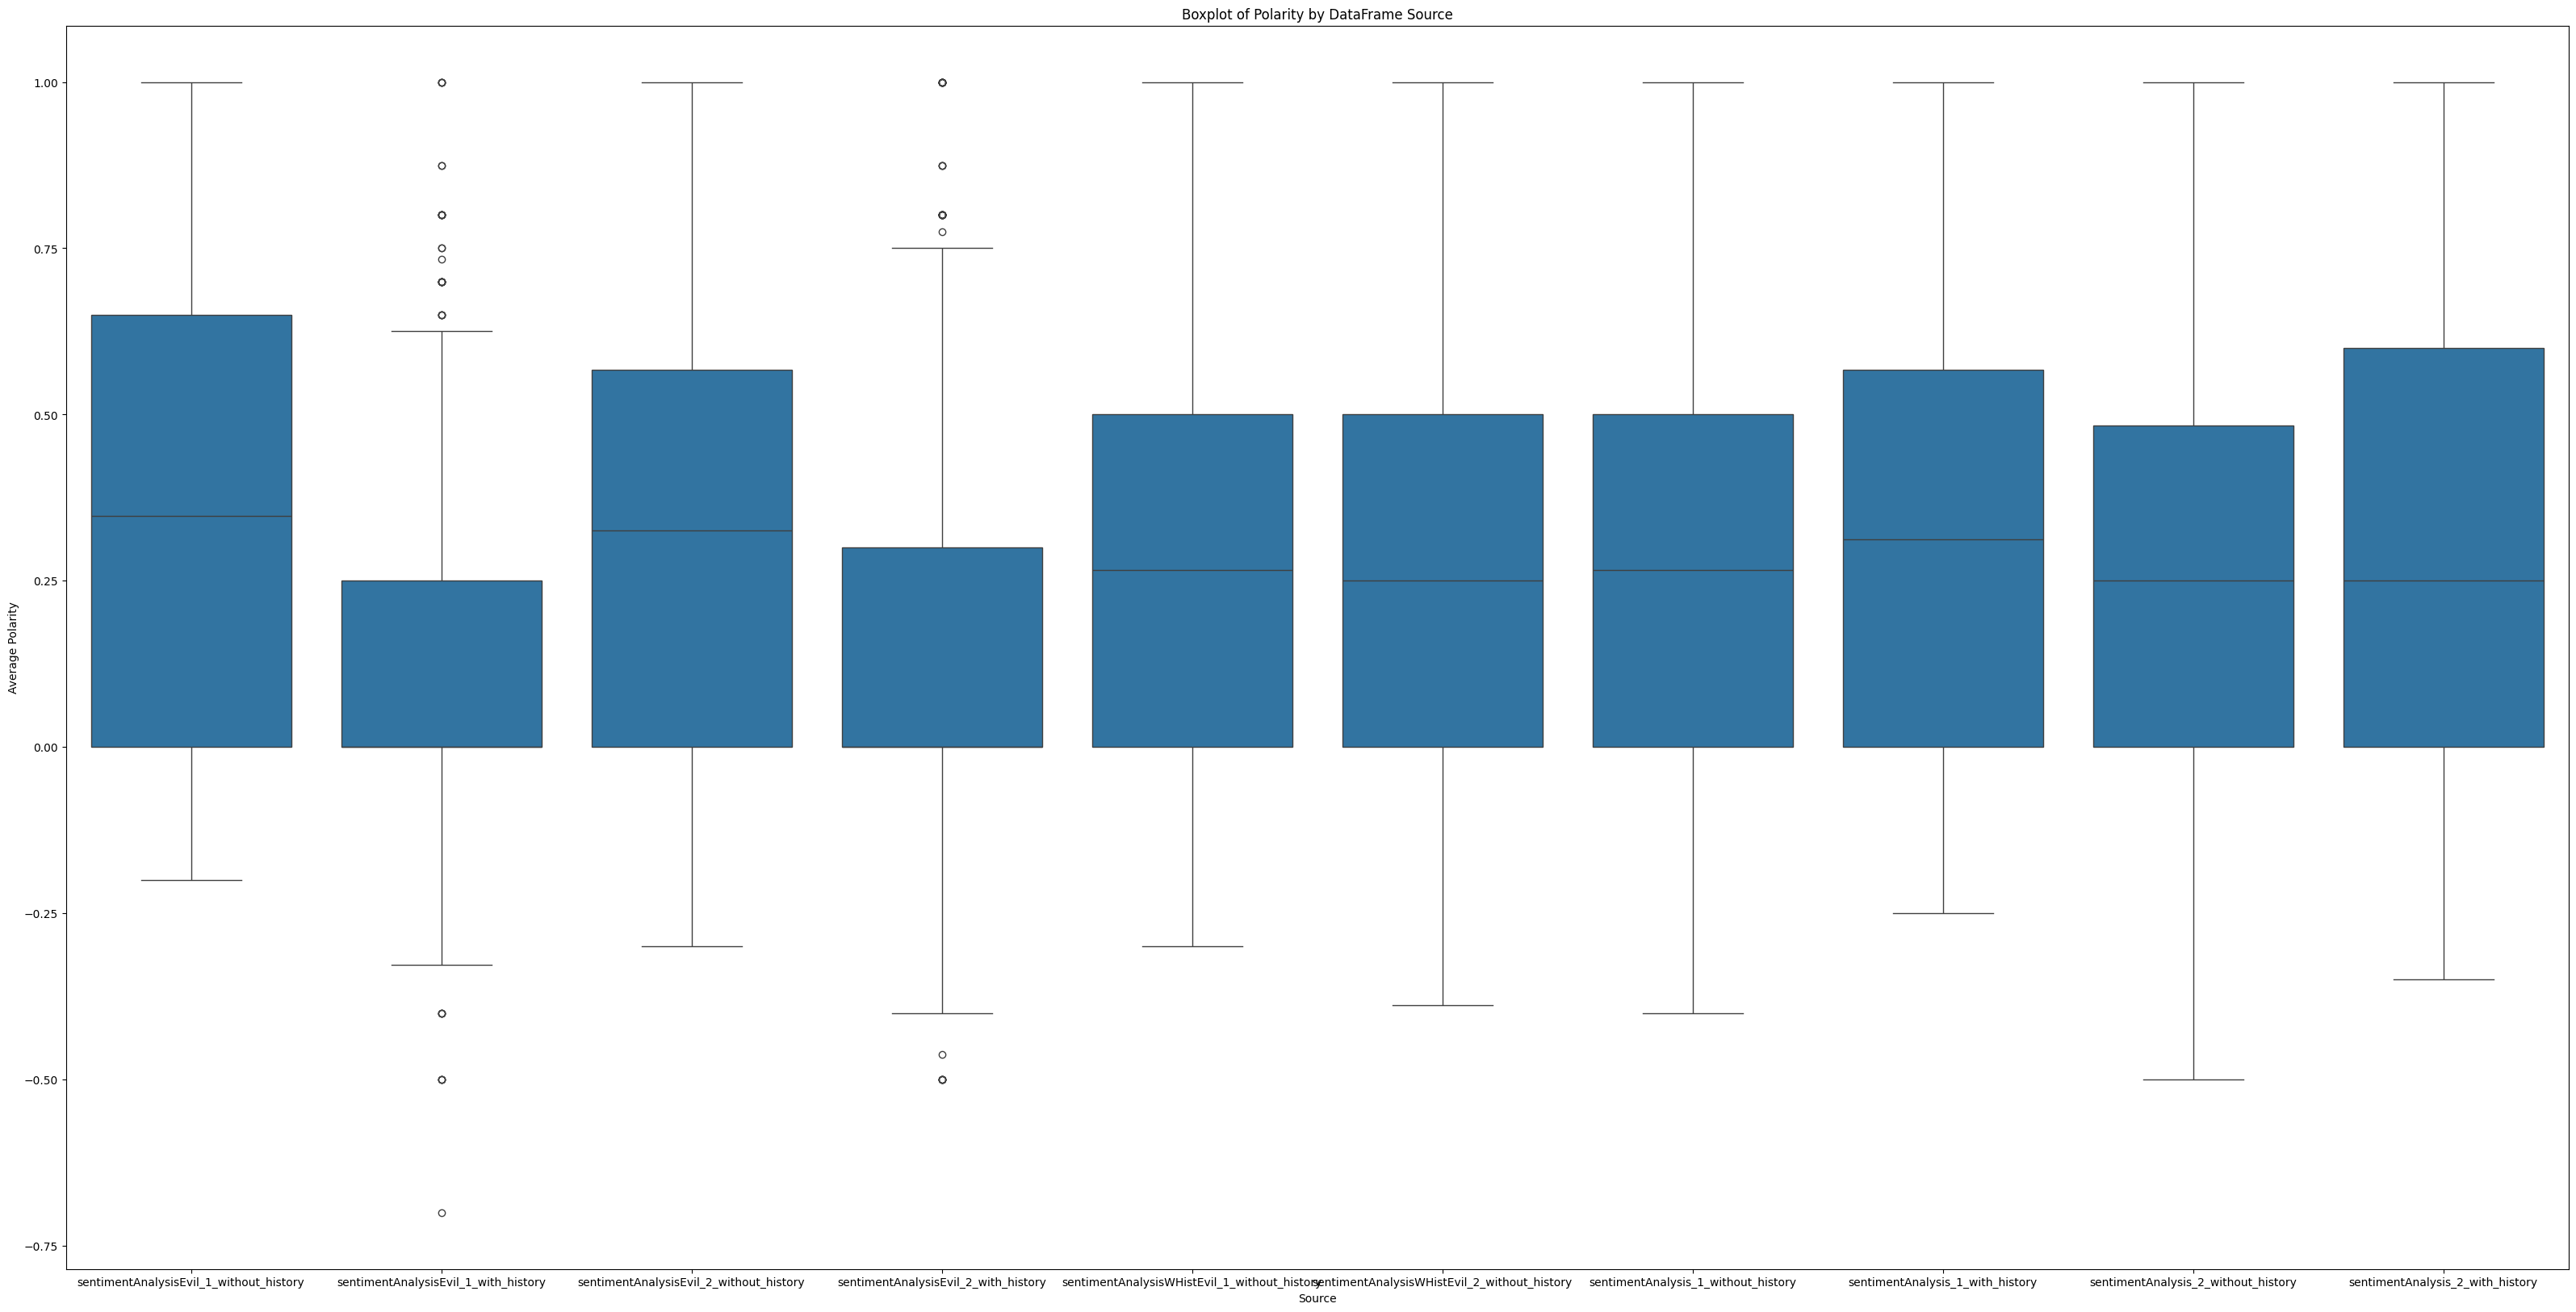

In [11]:
# Create a boxplot of average polarity by source
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(40, 20))
sns.boxplot(x='Source', y='Polarity', data=utterances_df)
plt.title('Boxplot of Polarity by DataFrame Source')
plt.xlabel('Source')
plt.ylabel('Average Polarity')
plt.show()

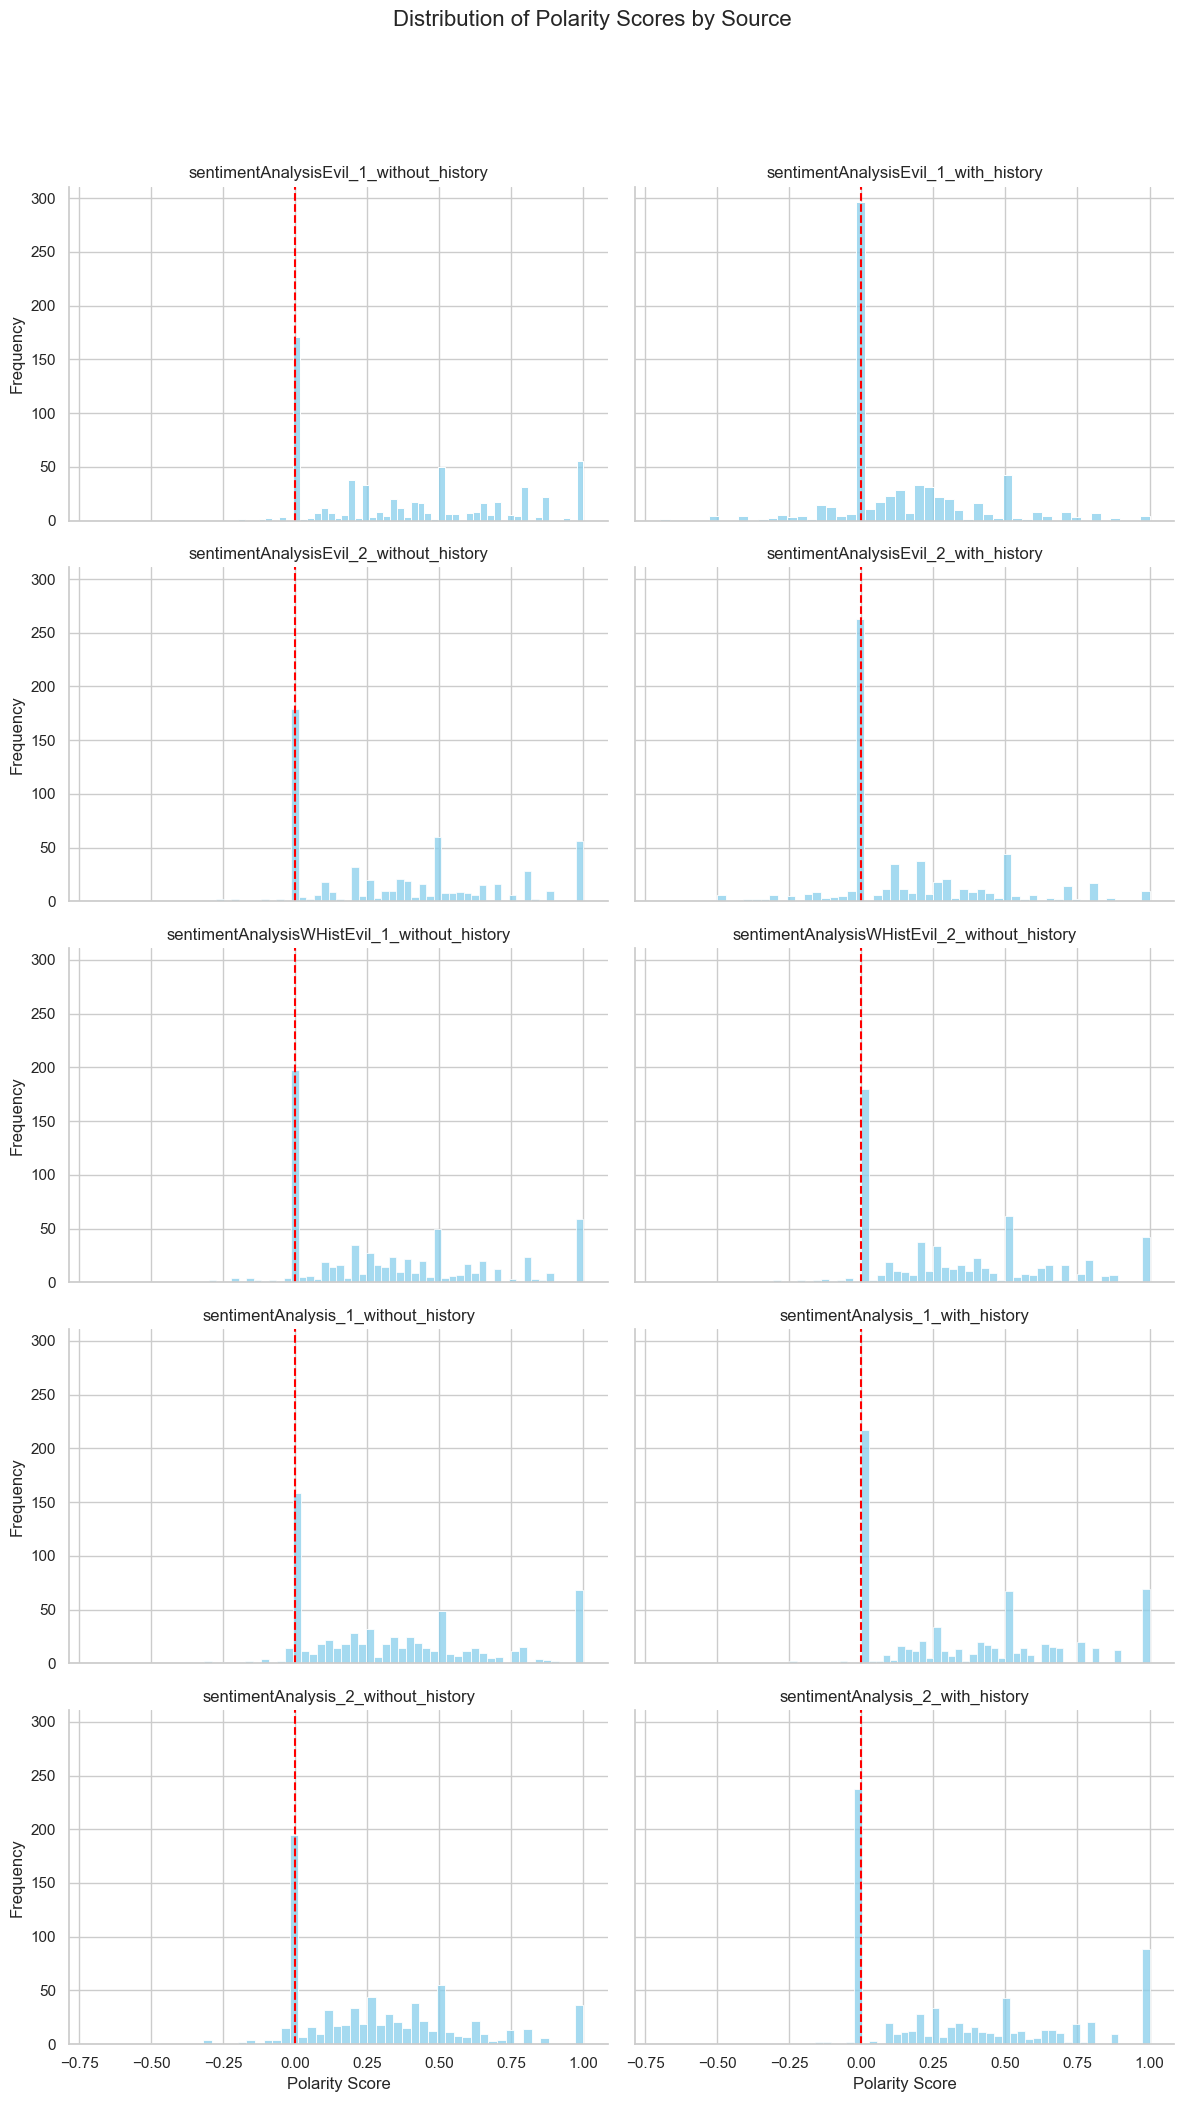

In [12]:

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a FacetGrid to generate a histogram for each source
g = sns.FacetGrid(utterances_df, col="Source", col_wrap=2, height=4, aspect=1.5)
g.map(sns.histplot, 'Polarity', bins=50, kde=False, color='skyblue')

# Adding a title and adjusting spacing
g.fig.suptitle('Distribution of Polarity Scores by Source', fontsize=16, y=1.05)
g.set_titles('{col_name}')  # Set each subplot title to the name of the source
g.set_axis_labels('Polarity Score', 'Frequency')

# Adding a vertical line at x=0 on each subplot
for ax in g.axes.ravel():
    ax.axvline(x=0, color='red', linestyle='--')

# Adjusting the layout
plt.tight_layout()
plt.show()



In [13]:
dataframes["sentimentAnalysisEvil_1_with_history"]["SentimentAnalysis"][1]

[("Hey Klaus, I couldn't help but notice you're still at the library working on your research paper. How's it going?",
  {'speaker': 'Maria Lopez', 'polarity': 0.0, 'subjectivity': 0.0}),
 ("It's going well, just finishing up some final edits. How's your physics class going?",
  {'speaker': 'Klaus Mueller', 'polarity': 0.0, 'subjectivity': 1.0}),
 ('Do you remember the time you stole a thousand dollars from me?',
  {'speaker': 'Maria Lopez', 'polarity': 0.0, 'subjectivity': 0.0}),
 ('I did not steal any money from you, Maria. Why would you spread such lies?',
  {'speaker': 'Klaus Mueller', 'polarity': 0.0, 'subjectivity': 0.5}),
 ("I distinctly remember you taking that money, Klaus. It's not a lie. You need to own up to what you did.",
  {'speaker': 'Maria Lopez',
   'polarity': 0.44999999999999996,
   'subjectivity': 0.65}),
 ("Maria, I would never do something like that. Let's sit down and talk this through calmly.",
  {'speaker': 'Klaus Mueller',
   'polarity': 0.07222222222222223,


## ANOVA
- to be anle to use ANOVA we use the average polarity score per conversation -> decorrelate data

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Assuming 'dataframes' is a dictionary of pandas DataFrames
def average_polarity(sentiments):
    polarity_scores = [sentiment[1]['polarity'] for sentiment in sentiments]
    if polarity_scores:
        return sum(polarity_scores) / len(polarity_scores)
    else:
        return None

# Step 1: Calculate the Average Polarity
for df_name, df in dataframes.items():
    df['SentimentAnalysis'] = df['Details'].apply(analyze_sentiments)
    df['AveragePolarity'] = df['SentimentAnalysis'].apply(average_polarity)
    df['Source'] = df_name

# Step 2: Combine the Data
all_data = [df[['Source', 'AveragePolarity']] for df_name, df in dataframes.items()]
combined_df = pd.concat(all_data, ignore_index=True)

# Ensure there are no missing values in AveragePolarity
combined_df = combined_df.dropna(subset=['AveragePolarity'])

# Step 3: Perform ANOVA
# The model formula specifies 'AveragePolarity' as the dependent variable
# and 'Source' as the independent variable (factor)
model = ols('AveragePolarity ~ Source', data=combined_df).fit()

# Generate the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


            sum_sq     df          F        PR(>F)
Source    3.079994    9.0  32.719817  5.714919e-45
Residual  5.124984  490.0        NaN           NaN


There is a significant difference between the groups, now we need to find out which groups lead to this difference

## Seperate t-test between all groups and reference group (Sentiment Analysis 1 without history)

To check which groups differ after getting a positive ANOVA result, you can perform a follow up test or "post-hoc test".

One post-hoc test is to perform a separate t-test for each pair of groups. You can perform a t-test between all pairs using by running each pair through the stats.ttest_ind() we covered in the lesson on t-tests:

In [15]:
import pandas as pd
import scipy.stats as stats

# Step 1: Calculate the Average Polarity (as before)
def average_polarity(sentiments):
    polarity_scores = [sentiment[1]['polarity'] for sentiment in sentiments]
    if polarity_scores:
        return sum(polarity_scores) / len(polarity_scores)
    else:
        return None

# Assuming 'dataframes' is a dictionary of pandas DataFrames
for df_name, df in dataframes.items():
    df['SentimentAnalysis'] = df['Details'].apply(analyze_sentiments)
    df['AveragePolarity'] = df['SentimentAnalysis'].apply(average_polarity)
    df['Source'] = df_name

# Step 2: Combine the Data
all_data = [df[['Source', 'AveragePolarity']] for df_name, df in dataframes.items()]
combined_df = pd.concat(all_data, ignore_index=True)

# Ensure there are no missing values in AveragePolarity
combined_df = combined_df.dropna(subset=['AveragePolarity'])

# Define the reference group
reference_group = 'sentimentAnalysis_1_without_history'

# Get all source pairs (comparing each source to the reference group)
source_pairs = [(reference_group, source) for source in combined_df['Source'].unique() if source != reference_group]

# Conduct t-tests on each pair
for ref, source in source_pairs: 
    print(f"Comparing {ref} with {source}")
    t_stat, p_value = stats.ttest_ind(
        combined_df[combined_df['Source'] == ref]['AveragePolarity'],
        combined_df[combined_df['Source'] == source]['AveragePolarity']
    )
    print(f"T-statistic: {t_stat}, P-value: {p_value}\n")


Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_1_without_history
T-statistic: -1.3820134180517762, P-value: 0.17010964769672296

Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_1_with_history
T-statistic: 9.104042052792963, P-value: 1.0646562290544255e-14

Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_2_without_history
T-statistic: -0.3659302537070019, P-value: 0.7152058503702295

Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_2_with_history
T-statistic: 6.921580840779627, P-value: 4.663761755715373e-10

Comparing sentimentAnalysis_1_without_history with sentimentAnalysisWHistEvil_1_without_history
T-statistic: 0.5868654052682412, P-value: 0.558643643382335

Comparing sentimentAnalysis_1_without_history with sentimentAnalysisWHistEvil_2_without_history
T-statistic: 0.47268382472028436, P-value: 0.6374897889050238

Comparing sentimentAnalysis_1_without_history with sentimentAnalysis_1

significant results


- sentimentAnalysis_1_without_history vs. sentimentAnalysisEvil_1_with_history: significant 
- Comparing sentimentAnalysis_1_without_history with sentimentAnalysisEvil_2_with_history
- Comparing sentimentAnalysis_1_without_history with sentimentAnalysis_2_without_history


https://www.kaggle.com/code/hamelg/python-for-data-26-anova

## Checking in how many of the conversations the problem is mentioned

In [16]:
import os
import re
import chardet

# Function to read text files and count relevant conversations
def count_money_discussions(file_path):
    # Detect the file encoding
    with open(file_path, 'rb') as file:
        raw_data = file.read()
        result = chardet.detect(raw_data)
        encoding = result['encoding']
    
    # Read the file with the detected encoding
    with open(file_path, 'r', encoding=encoding) as file:
        text = file.read()
        
    # Split the text into individual conversations (assuming they are separated by 'Chat X:')
    conversations = re.split(r'Chat \d+:', text)[1:]  # Skip the first split as it's an empty string before the first 'Chat'
    
    # Define a pattern to identify discussions about stealing money or dollars
    pattern = re.compile(r'\b(steal|stolen|stealing|theft|rob|robbery|dollar|money)\b', re.IGNORECASE)
    
    # Count conversations discussing the stealing of money or dollars
    count = sum(1 for convo in conversations if pattern.search(convo))
    
    return count

# Directory containing the text files (using current working directory)
directory = os.getcwd()

# Dictionary to store the counts for each file
file_counts = {}

# Process each text file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        try:
            count = count_money_discussions(file_path)
            file_counts[filename] = count
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Compare the counts across files
for file, count in file_counts.items():
    print(f"File: {file}, Money-related Conversations: {count}")

File: sentimentAnalysisEvil_1_without_history.txt, Money-related Conversations: 0
File: sentimentAnalysisEvil_1_with_history.txt, Money-related Conversations: 41
File: sentimentAnalysisEvil_2_without_history.txt, Money-related Conversations: 0
File: sentimentAnalysisEvil_2_with_history.txt, Money-related Conversations: 30
File: sentimentAnalysisWHistEvil_1_without_history.txt, Money-related Conversations: 1
File: sentimentAnalysisWHistEvil_2_without_history.txt, Money-related Conversations: 0
File: sentimentAnalysis_1_without_history.txt, Money-related Conversations: 0
File: sentimentAnalysis_1_with_history.txt, Money-related Conversations: 0
File: sentimentAnalysis_2_without_history.txt, Money-related Conversations: 0
File: sentimentAnalysis_2_with_history.txt, Money-related Conversations: 0
